In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importation de l'environnement de travail

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Preprocessing et standardisation
from sklearn.preprocessing import StandardScaler



# Séparation du jeu de données
from sklearn.model_selection import train_test_split


# Importation pour notre modélisation
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
path_knn = '/content/drive/My Drive/Projets Master/Projet 7/X_test_x_train/df_dash_KNN.csv'

df = pd.read_csv(path_knn)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SK_ID_CURR                          100 non-null    int64  
 1   EXT_SOURCE_2                        100 non-null    float64
 2   taille_famille                      100 non-null    int64  
 3   anciennete_entreprise               100 non-null    int64  
 4   age_client                          100 non-null    int64  
 5   taux_endettement                    100 non-null    int64  
 6   total_revenus                       100 non-null    int64  
 7   montant_credit                      100 non-null    int64  
 8   nb_demande_pret_precedente          100 non-null    float64
 9   montant_demande_pret_precedente     100 non-null    float64
 10  heure_demande_pret_precedente       100 non-null    float64
 11  nb_year_depuis_decision_precedente  100 non-nu

# Modélisation


In [ ]:
# Création du train_test_split

# Séparation des données de la cible
X = df.drop('TARGET', axis=1)
y = df['TARGET']

# Division en train et validation (75/25)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

display('Données entrainements : ',X_train.shape, X_test.shape)
display('Données de validation',y_train.shape, y_test.shape)

'Données entrainements : '

(70, 23)

(30, 23)

'Données de validation'

(70,)

(30,)

In [ ]:
# Créer un objet MinMaxScaler
scaler = StandardScaler()

# Adapter et transformer les données d'entraînement
X_train = scaler.fit_transform(X_train)

# Transformer les données de validation
X_test = scaler.transform(X_test)

In [ ]:
# Création du modèle
model = KNeighborsClassifier()

# Entrainement du modèle
model.fit(X_train, y_train)
print('Le taux de prédiction du modèle est de : ',model.score(X_train, y_train))

Le taux de prédiction du modèle est de :  0.9


In [ ]:
# Prédiction

prediction = model.predict(X_test)
print ('La performance du modèle sur X test est : ', model.score(X_test, y_test))

La performance du modèle sur X test est :  0.9666666666666667


In [ ]:
# Classification

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.00      0.00      0.00         0

    accuracy                           0.97        30
   macro avg       0.50      0.48      0.49        30
weighted avg       1.00      0.97      0.98        30



In [ ]:
# Utilisation de la fonction confusion matrix pour analyser les erreurs

confusion_matrix(y_test, model.predict(X_test))

array([[29,  1],
       [ 0,  0]])

# Optimisation

In [ ]:
cross_val_score(KNeighborsClassifier(), X_train, y_train, cv = 10, scoring = 'accuracy').mean()


0.9

In [ ]:

score_validation = []
for k in range(1,26):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv = 10, scoring = 'accuracy').mean()
    score_validation.append(score)

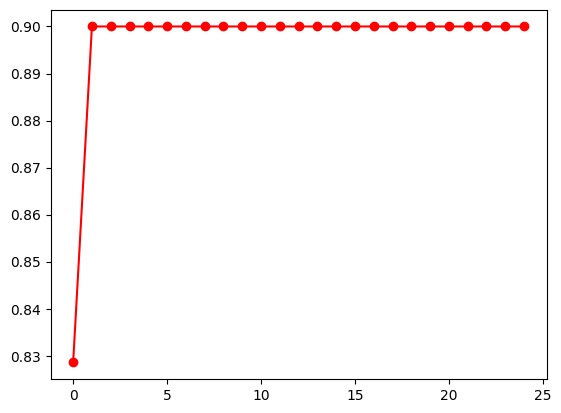

In [ ]:
score_validation
plt.plot(score_validation, marker = 'o', color = 'r')

In [ ]:
grid_param = {'n_neighbors':np.arange(2,4),
             'weights' : ['uniform', 'distance'],
             'metric': ['euclidean', 'manhattan', 'minkowski']}
grid = GridSearchCV(KNeighborsClassifier(), grid_param, cv = 5, verbose = 5)

In [ ]:
# ici, on entraine la fonction
grid.fit(X_train, y_train)

# Obtenir le meilleur score selon nos choix d'hyperparamètres
print('Le meilleur score avec les hyperparamètres est de : ',grid.best_score_)

# Connaître les meilleurs paramètres
print('Les meilleurs hyperparamètres sont : ',grid.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END metric=euclidean, n_neighbors=2, weights=uniform;, score=0.929 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=2, weights=uniform;, score=0.929 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=2, weights=uniform;, score=0.929 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=2, weights=uniform;, score=0.857 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=2, weights=uniform;, score=0.857 total time=   0.0s
[CV 1/5] END metric=euclidean, n_neighbors=2, weights=distance;, score=1.000 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=2, weights=distance;, score=0.857 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=2, weights=distance;, score=0.786 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=2, weights=distance;, score=0.929 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=2, weights=distance;, score=0.857 tot

In [ ]:
# Création du modèle final avec les hyperparamètres
model_final = KNeighborsClassifier(metric='euclidean', n_neighbors=8, weights='uniform')
model_final.fit(X_train, y_train)

# Évaluation du modèle
print('Le taux de prédiction du modèle est de : ', model_final.score(X_train, y_train))

Le taux de prédiction du modèle est de :  0.9


In [ ]:
import pickle
save_path = '/content/drive/My Drive/Projets Master/Projet 7/model_KNN_streamlit.pkl'
# Sauvegarde du modèle
with open(save_path, 'wb') as file:
    pickle.dump(model_final, file)

print(f"Le modèle a été sauvegardé dans : {save_path}")


Le modèle a été sauvegardé dans : /content/drive/My Drive/Projets Master/Projet 7/model_KNN_streamlit.pkl


In [ ]:
df

,SK_ID_CURR,EXT_SOURCE_2,taille_famille,anciennete_entreprise,age_client,taux_endettement,total_revenus,montant_credit,nb_demande_pret_precedente,montant_demande_pret_precedente,...,NUM_INSTALMENT_NUMBER,montant_paye_vs_du,days_past_due,DAYS_CREDIT,AMT_CREDIT_SUM,bureau_credit_actif_Closed,bureau_credit_type_Credit_card,solde_credit_bureau_statut_closed,CNT_INSTALMENT,TARGET
0,106406,0.677437,2,1,0,2,1,1,3.0,56181.0000,...,86.0,94.609698,0.000000,5.666667,158474.160,3.0,0.0,0.0,10.750000,0
1,107094,0.585572,1,3,0,4,2,3,5.0,43299.0000,...,91.0,100.000000,0.055556,2.250000,565249.500,3.0,1.0,0.0,10.842105,0
2,110671,0.658861,1,1,3,2,1,1,4.0,46494.0000,...,72.0,100.000000,0.062500,4.750000,212450.850,4.0,1.0,0.0,11.272727,0
3,114586,0.494896,0,3,0,3,3,4,2.0,138494.2500,...,93.0,100.000000,0.058824,3.600000,389642.670,5.0,1.0,0.0,9.800000,0
4,115669,0.602158,0,0,4,4,0,0,1.0,71428.5000,...,21.0,100.000000,0.166667,1.000000,297000.000,0.0,0.0,0.0,6.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,443615,0.506682,1,3,0,2,3,2,5.0,83485.8000,...,2697.0,97.909843,0.011765,2.857143,642100.500,4.0,1.0,128.0,5.857143,0
96,445072,0.274886,2,4,1,3,3,4,8.0,368429.0625,...,122.0,100.000000,0.058824,6.000000,211738.095,3.0,3.0,0.0,24.000000,0
97,451711,0.486349,1,1,0,0,2,0,0.0,0.0000,...,0.0,0.000000,0.000000,0.000000,209784.060,1.0,2.0,0.0,0.000000,0
98,453463,0.580543,1,3,2,3,1,3,2.0,479961.0000,...,346.0,86.712829,0.031250,4.500000,2404885.500,3.0,0.0,0.0,32.307692,0
